# Preprocessed Citibike Data: Exploratory Data Analysis

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Import and load data

Import preprocessed data:

In [17]:
cb_raw = pd.read_csv('../../data/02_processed/citibike_feature_engineered_final.csv', 
                     parse_dates=['birthyear','starttime', 'stoptime'])

Make a copy: 

In [18]:
cb = cb_raw.copy()

## Inspect data frame

Get dimensions of data frame and datatypes of each feature:

In [19]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015035 entries, 0 to 4015034
Data columns (total 37 columns):
bikeid                   int64
birthyear                datetime64[ns]
endstationid             int64
endstationlatitude       float64
endstationlongitude      float64
endstationname           object
gender                   int64
startstationid           int64
startstationlatitude     float64
startstationlongitude    float64
startstationname         object
starttime                datetime64[ns]
stoptime                 datetime64[ns]
tripduration             int64
usertype                 object
vicentydistance          float64
manhdistance             float64
startmonth               int64
stopmonth                int64
startdayname             object
startday                 int64
stopdayname              object
stopday                  int64
startdaytype             object
enddaytype               object
starthour                int64
endhour                  int64
star

Randomly sample five observations:

In [20]:
cb.sample(n=5)

,bikeid,birthyear,endstationid,endstationlatitude,endstationlongitude,endstationname,gender,startstationid,startstationlatitude,startstationlongitude,...,startrushhour,endrushhour,starttimeofday,endtimeofday,age_at_ride,age_group,startneighborhood,endneighborhood,startboro,endboro
567448,22320,1988-01-01,529,40.757570,-73.990985,W 42 St & 8 Ave,1,496,40.737262,-73.992390,...,Afternoon Rush,Afternoon Rush,Evening (5-7:59PM),Evening (5-7:59PM),28,20s,New York County,Theater District,Manhattan,Manhattan
2533843,28198,1986-01-01,3059,40.693398,-73.939877,Pulaski St & Marcus Garvey Blvd,1,3064,40.696820,-73.937569,...,Afternoon Rush,Afternoon Rush,Afternoon (12PM-4:59PM),Afternoon (12PM-4:59PM),33,30s,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,Brooklyn
3940442,31626,1986-01-01,3436,40.721319,-74.010065,Greenwich St & Hubert St,1,3255,40.750585,-73.994685,...,Morning Rush,Morning Rush,Morning (6AM-11:59PM),Morning (6AM-11:59PM),31,30s,Chelsea,Tribeca,Manhattan,Manhattan
3229252,21079,1960-01-01,504,40.732219,-73.981656,1 Ave & E 15 St,1,518,40.747804,-73.973442,...,Afternoon Off-Peak,Afternoon Off-Peak,Afternoon (12PM-4:59PM),Afternoon (12PM-4:59PM),55,50s,Murray Hill,Stuy Town,Queens,Manhattan
1528086,15042,1986-01-01,520,40.759923,-73.976485,W 52 St & 5 Ave,1,72,40.767272,-73.993929,...,Afternoon Off-Peak,Afternoon Off-Peak,Morning (6AM-11:59PM),Morning (6AM-11:59PM),33,30s,Hell's Kitchen,Midtown,Manhattan,Manhattan


Check for missing values – there should be none:

In [21]:
cb.isnull().sum()

bikeid                   0
birthyear                0
endstationid             0
endstationlatitude       0
endstationlongitude      0
endstationname           0
gender                   0
startstationid           0
startstationlatitude     0
startstationlongitude    0
startstationname         0
starttime                0
stoptime                 0
tripduration             0
usertype                 0
vicentydistance          0
manhdistance             0
startmonth               0
stopmonth                0
startdayname             0
startday                 0
stopdayname              0
stopday                  0
startdaytype             0
enddaytype               0
starthour                0
endhour                  0
startrushhour            0
endrushhour              0
starttimeofday           0
endtimeofday             0
age_at_ride              0
age_group                0
startneighborhood        0
endneighborhood          0
startboro                0
endboro                  0
d

## Data preprocessing

### Define features

Define numerical features:

In [22]:
map_feat = ['endstationlatitude','endstationlongitude','startstationlatitude','startstationlongitude']
datetime_feat = ['birthyear','starttime', 'stoptime']
cont_feat = map_feat + datetime_feat + ['tripduration']

Define categorical features:

In [23]:
num_nom_feat = ['bikeid','endstationid','startstationid','gender','age_at_ride']
cat_nom_feat = ['endstationname','startstationname','usertype',
               'startneighborhood','startboro','endneighborhood','endboro',
               'startdayname','stopdayname','startdaytype','enddaytype',
               'startrushhour','endrushhour','starttimeofday','endtimeofday',
               'age_group']
nom_feat = num_nom_feat + cat_nom_feat

### Perform datatype conversions

Convert to datetime format:

In [24]:
cb['birthyear'] = pd.to_datetime(cb.birthyear, format='%Y')

Convert features to `float16` or `int16` to reduce memory:

In [25]:
float_to_int = ['startstationid','endstationid','tripduration','bikeid','gender']

cb[float_to_int] = cb[float_to_int].apply(lambda x: x.astype('int16'))

In [30]:
int64_to_int16 = ['startmonth','stopmonth','stopday','starthour','endhour','age_at_ride']

cb[int64_to_int16] = cb[int64_to_int16].apply(lambda x: x.astype('int16'))

Convert untreated nominal features to categorical datatype to reduce memory:

In [26]:
cb[cat_nom_feat] = cb[cat_nom_feat].apply(lambda x: x.astype('category'))

In [28]:
cb['vicentydistance'] = cb['vicentydistance'].astype('float16')
cb['manhdistance'] = cb['manhdistance'].astype('float16')

Check for successful datatype conversion and reduction in memory:

In [31]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015035 entries, 0 to 4015034
Data columns (total 37 columns):
bikeid                   int16
birthyear                datetime64[ns]
endstationid             int16
endstationlatitude       float64
endstationlongitude      float64
endstationname           category
gender                   int16
startstationid           int16
startstationlatitude     float64
startstationlongitude    float64
startstationname         category
starttime                datetime64[ns]
stoptime                 datetime64[ns]
tripduration             int16
usertype                 category
vicentydistance          float16
manhdistance             float16
startmonth               int16
stopmonth                int16
startdayname             category
startday                 int64
stopdayname              category
stopday                  int16
startdaytype             category
enddaytype               category
starthour                int16
endhour              

## Inspect data

### Demographics: Age, Gender, and User Type

The following graphs depict `Proportion of Rides` by rider demographics:

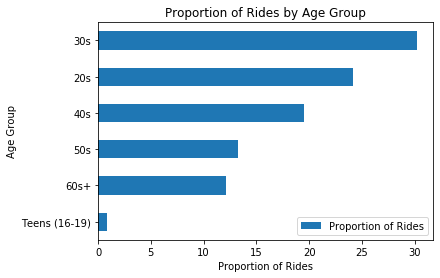

In [32]:
rides_by_age = cb.pivot_table('bikeid', index='age_group', aggfunc=len, fill_value=0).div(len(cb.index)).mul(100)
rides_by_age.columns = (['Proportion of Rides'])
rides_by_age.sort_values(ascending=True, by='Proportion of Rides').plot(kind='barh')
plt.title('Proportion of Rides by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Proportion of Rides')
plt.show();

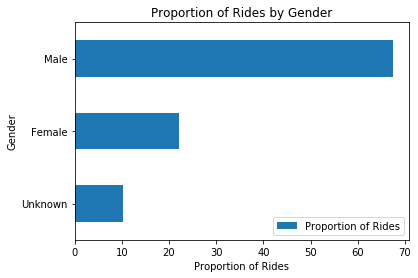

In [33]:
rides_by_gender = cb.pivot_table('bikeid', index='gender', aggfunc=len, fill_value=0).div(len(cb.index)).mul(100)
rides_by_gender.columns = (['Proportion of Rides'])
rides_by_gender.index = (['Unknown','Male','Female'])
rides_by_gender.sort_values(ascending=True, by='Proportion of Rides').plot(kind='barh')
plt.title('Proportion of Rides by Gender')
plt.ylabel('Gender')
plt.xlabel('Proportion of Rides')
plt.show();

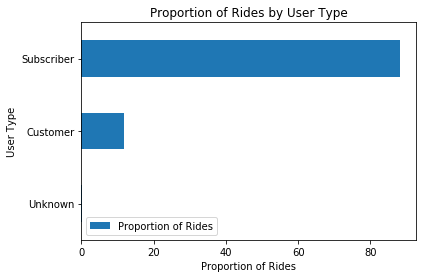

In [34]:
rides_by_usertype = cb.pivot_table('bikeid', index='usertype', aggfunc=len, fill_value=0).div(len(cb.index)).mul(100)
rides_by_usertype.columns = (['Proportion of Rides'])
rides_by_usertype
rides_by_usertype.sort_values(ascending=True, by='Proportion of Rides').plot(kind='barh')
plt.title('Proportion of Rides by User Type')
plt.ylabel('User Type')
plt.xlabel('Proportion of Rides')
plt.show();

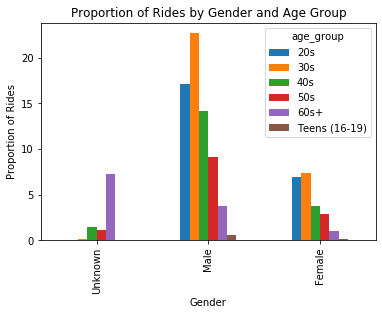

In [35]:
rides_by_gender_age = cb.pivot_table('bikeid', index='gender', columns='age_group', aggfunc=len, fill_value=0).div(len(cb.index)).mul(100)
rides_by_gender_age.index = (['Unknown', 'Male', 'Female'])
rides_by_gender_age.plot(kind='bar')
plt.title('Proportion of Rides by Gender and Age Group')
plt.ylabel('Proportion of Rides')
plt.xlabel('Gender')
plt.show();

The following graphs depict `Trip Distance` and `Trip Duration` by rider demographics:

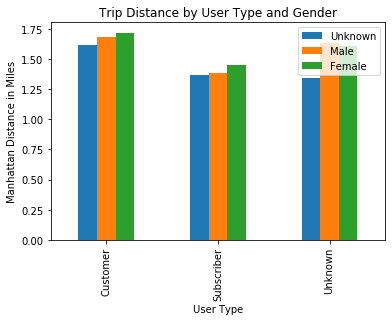

In [36]:
manhdist_by_usertype_gender = cb.pivot_table('manhdistance', index='usertype', columns='gender')
manhdist_by_usertype_gender.columns = (['Unknown','Male','Female'])
manhdist_by_usertype_gender.plot(kind='bar')
plt.title('Trip Distance by User Type and Gender')
plt.xlabel('User Type')
plt.ylabel('Manhattan Distance in Miles')
plt.show();

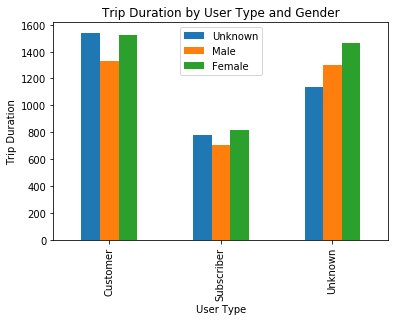

In [37]:
tripduration_by_usertype_gender = cb.pivot_table('tripduration', index='usertype', columns='gender')
tripduration_by_usertype_gender.columns = (['Unknown','Male','Female'])
tripduration_by_usertype_gender.plot(kind='bar')
plt.title('Trip Duration by User Type and Gender')
plt.xlabel('User Type')
plt.ylabel('Trip Duration')
plt.show();

### Geography: Neighborhoods, Boroughs, and Station Locations

In [ ]:
# cb.pivot_table('manhdistance', index='starthou', columns='startneighborhood')
pd.DataFrame(cb.groupby(['startneighborhood'])['starthour'].value_counts()
# tripduration_by_usertype_gender.columns = (['Unknown','Male','Female'])
# tripduration_by_usertype_gender.plot(kind='bar')
# plt.title('Trip Duration by User Type and Gender')
# plt.xlabel('User Type')
# plt.ylabel('Trip Duration')
# plt.show();

### Rides: Number of Rides, Trip Distance, Trip Duration

Inspect number of rides per day:

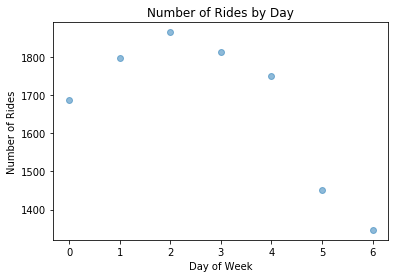

In [38]:
x=cb.startday.value_counts().index
y=cb.startday.value_counts()/(343) #divide by number of weeks to get mean rides per day
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Day')
plt.show()

Inspect number of rides per hour:

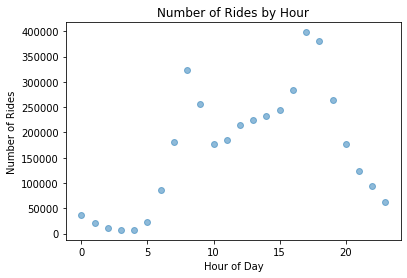

In [39]:
x=cb.starthour.value_counts().index
y=cb.starthour.value_counts()
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Hour')
plt.show()

Inspect number of rides per month:

In [40]:
index=[1,7,8,9,10,11,12]
#y[index] = y[index]*(6/7) #to fix over sampling from Jan 2020 and July-December 2013
y = y.round().astype('int32')

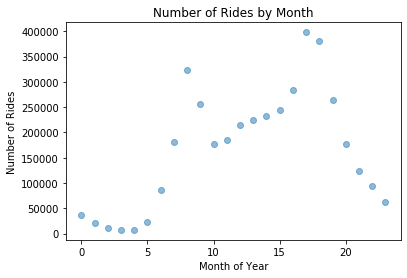

In [41]:
#ad-hocly adjusted for the oversampling of Jan, July-December months 
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Month of Year')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Month')
plt.show()

Inspect `vicentydistance` by month:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



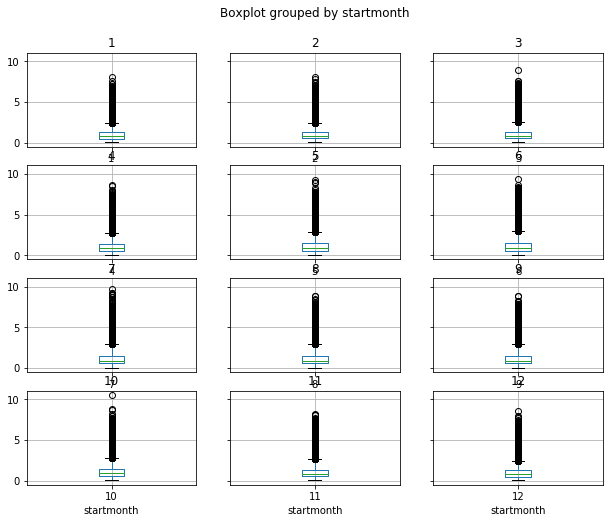

In [42]:
#adjusted for ease of interpretation
x=cb['vicentydistance'].sort_values(ascending=False).index
y=cb['vicentydistance'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
cb.groupby('startmonth').boxplot(column=['vicentydistance'], by='startmonth', ax=ax)
plt.show()

## Appendix

### Identifying unique trips

Create new feature, `uniquetripid`:

In [43]:
cb_filtered = cb[cb['birthyear'].dt.year.astype('int16') > 1920]
cb_filtered['birthyear'] = cb_filtered['birthyear'].dt.year.astype('int16')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
cb_filtered.groupby(['birthyear','gender','usertype','startstationid','starttime','startneighborhood']).size()

birthyear  gender  usertype    startstationid  starttime                startneighborhood   
1921       1       Subscriber  116             2016-07-20 17:06:09.000  Chelsea                 1
                                               2016-08-24 17:10:05.000  Chelsea                 1
                               160             2014-05-18 00:48:37.000  Murray Hill             1
                               217             2013-06-25 19:56:56.000  DUMBO                   1
                               228             2014-09-02 19:25:14.000  Turtle Bay              1
                                                                                               ..
2003       2       Subscriber  3361            2020-01-06 18:25:57.369  Park Slope              1
                               3377            2019-12-31 23:46:46.006  Gowanus                 1
                               3398            2019-08-30 18:46:54.397  Kings County            1
                         

In [45]:
cb_filtered.groupby(['startneighborhood','startstationid','starttime','usertype','birthyear','gender']).size()

startneighborhood  startstationid  starttime                usertype    birthyear  gender
Alphabet City      150             2013-06-01 10:59:18.000  Subscriber  1970       1         1
                                   2013-06-01 12:27:32.000  Subscriber  1986       1         1
                                   2013-06-01 13:58:19.000  Subscriber  1982       1         1
                                   2013-06-02 13:56:50.000  Subscriber  1983       1         1
                                   2013-06-02 14:40:22.000  Subscriber  1956       1         1
                                                                                            ..
Yorkville          3747            2019-10-15 19:13:29.079  Subscriber  1989       1         1
                                   2019-10-17 22:09:40.602  Subscriber  1966       1         1
                                   2019-10-18 07:26:32.927  Subscriber  1993       2         1
                                   2019-10-18 08:13:32.